In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Read the Clean Data
data = pd.read_csv('pima_diabetes_clean.csv')
array = data.values
X_Orginal = array[:,0:8]
Y_Orginal = array[:,8]
data.head()
#Read the data with 20 percent noisy rows
data1 = pd.read_csv('pima_diabetes_30_per.csv')
array = data1.values
X_Noise = array[:,0:8]
Y_Noise = array[:,8]
data1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,11.438,107.737,71.466,35.000,0.000,33.600,2.321,51.032,1
1,4.470,47.108,66.000,54.425,312.072,26.600,0.351,31.000,0
2,16.015,160.119,1.801,59.879,0.000,23.300,0.672,32.000,1
3,1.000,89.000,66.000,1.396,94.000,28.100,0.167,21.000,0
4,0.000,137.000,65.791,35.000,168.000,25.972,2.288,33.000,1


In [3]:
#Correlations in Original Data
correlations = data.corr()
correlations['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

In [4]:
#Correlations in Noisy Data
correlations = data1.corr()
correlations['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.205452
BMI                         0.132644
Pregnancies                 0.094513
Age                         0.080320
Insulin                     0.042394
BloodPressure               0.038933
SkinThickness               0.021781
DiabetesPedigreeFunction   -0.000748
Name: Outcome, dtype: float64

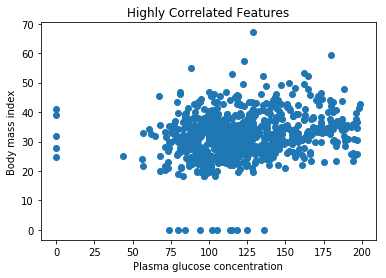

In [5]:
#Visualizing the Original Data
def visualise(data):
    fig, ax = plt.subplots()
    ax.scatter(data.iloc[:,1].values, data.iloc[:,5].values)
    ax.set_title('Highly Correlated Features')
    ax.set_xlabel('Plasma glucose concentration')
    ax.set_ylabel('Body mass index')

visualise(data)

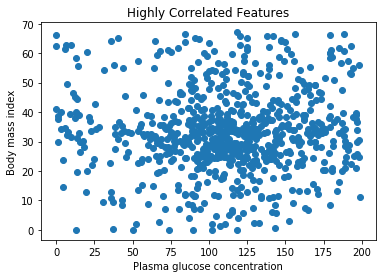

In [6]:
#Visualizing the Noisy Data
def visualise(data1):
    fig, ax = plt.subplots()
    ax.scatter(data1.iloc[:,1].values, data1.iloc[:,5].values)
    ax.set_title('Highly Correlated Features')
    ax.set_xlabel('Plasma glucose concentration')
    ax.set_ylabel('Body mass index')

visualise(data1)

In [7]:
#Cleaning up  original data

data[['Glucose','BMI']] = data[['Glucose','BMI']].replace(0, np.NaN)
data.dropna(inplace=True)

In [8]:
#Cleaning up noisy data

data1[['Glucose','BMI']] = data1[['Glucose','BMI']].replace(0, np.NaN)
data1.dropna(inplace=True)

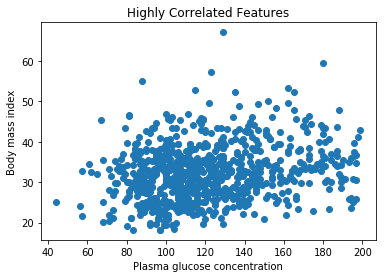

In [9]:
#Visualize Clean Data
visualise(data)

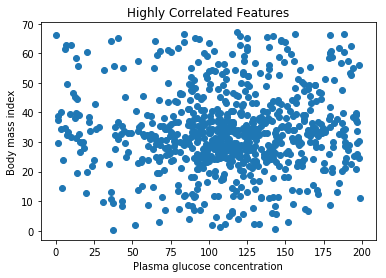

In [10]:
#Visualize Noisy Data
visualise(data1)

In [11]:
#Assigning values for original data

X = data[['Glucose','BMI']].values
y = data[['Outcome']].values

In [12]:
#Assigning values for Noisy data

X1 = data1[['Glucose','BMI']].values
y1 = data1[['Outcome']].values

In [13]:
#Pre-processing for Original Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [14]:
mean = np.mean(X, axis=0)
print('Mean: (%d, %d)' % (mean[0], mean[1]))
standard_deviation = np.std(X, axis=0)
print('Standard deviation: (%d, %d)' % (standard_deviation[0], standard_deviation[1]))

Mean: (0, 0)
Standard deviation: (1, 1)


In [15]:
print(X[0:10,:])

[[ 0.85211873  0.16540919]
 [-1.2079944  -0.84552075]
 [ 1.99662603 -1.322102  ]
 [-1.07719357 -0.62889291]
 [ 0.49241644  1.53738552]
 [-0.19428794 -0.98993931]
 [-1.43689586 -0.21007908]
 [-0.22698815  0.41092074]
 [ 2.45442895 -0.28228836]
 [-0.39048919  0.74308343]]


In [16]:
#Pre-processing for Noisy Data
from sklearn.preprocessing import StandardScaler
sc1 = StandardScaler()
X1 = sc.fit_transform(X1)

In [17]:
mean = np.mean(X1, axis=0)
print('Mean: (%d, %d)' % (mean[0], mean[1]))
standard_deviation = np.std(X1, axis=0)
print('Standard deviation: (%d, %d)' % (standard_deviation[0], standard_deviation[1]))

Mean: (0, 0)
Standard deviation: (1, 0)


In [18]:
print(X1[0:10,:])

[[-0.11209787  0.02178424]
 [-1.4798645  -0.49049843]
 [ 1.06961965 -0.73200313]
 [-0.5347973  -0.38072358]
 [ 0.54806401 -0.53645751]
 [ 0.07431219 -0.56368167]
 [-1.14979484 -0.16849218]
 [ 0.05175258  0.14619575]
 [ 1.90164064  0.03890912]
 [ 0.10950518 -0.26699682]]


In [19]:
#Test-Train split for Original Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [20]:
#Test-Train Split for Noisy Data
from sklearn.model_selection import train_test_split
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X1, y1, test_size = 0.2, random_state = 0)

In [21]:
#Modelling with Noisy Training Data and Clean Test data

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(X_train_1, y_train_1.ravel())
y_pred = model.predict(X_test)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[99  5]
 [33 14]]


In [23]:
#Calculate F1 score
def precision_recall(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)    
    tp = cm[0,0]
    fp = cm[0,1]
    fn = cm[1,0]
    prec = tp / (tp+fp)
    rec = tp / (tp+fn)    
    return prec, rec

precision, recall = precision_recall(y_test, y_pred)
print('Precision: %f Recall %f' % (precision, recall))

#F1 Score Computation

F1 = 2 * (precision * recall) / (precision + recall)

print("F1 Score %f" %(F1))

Precision: 0.951923 Recall 0.750000
F1 Score 0.838983


In [24]:
# Accuracy
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(model, X_Noise, Y_Orginal, cv=kfold, scoring=scoring)
print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))

Accuracy: 0.672 (0.060)


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

In [25]:
# Area Under AUC

scoring = 'roc_auc'
results = model_selection.cross_val_score(model, X_Noise, Y_Orginal, cv=kfold, scoring=scoring)
print("AUC: %.3f (%.3f)" % (results.mean(), results.std()))

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


AUC: 0.641 (0.073)


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

In [26]:
# Classification Report

from sklearn.metrics import classification_report

model.fit(X_train_1, y_train_1)
predicted = model.predict(X_test)
report = classification_report(y_test, predicted)
print(report)

              precision    recall  f1-score   support

           0       0.75      0.95      0.84       104
           1       0.74      0.30      0.42        47

   micro avg       0.75      0.75      0.75       151
   macro avg       0.74      0.62      0.63       151
weighted avg       0.75      0.75      0.71       151



/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
